In order to assign SN to galaxies in LSST CatSim, we need to know the following

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
import pandas as pd

In [5]:
from astropy.cosmology import FlatLambdaCDM

/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [6]:
cosmo = FlatLambdaCDM(H0=73.0, Om0=0.25)

In [7]:
def snRate(z, cosmo, alpha=2.6e-5, beta=1.5):
    """
    The rate of SN in units of number of SN/ comoving volume in Mpc^3/yr
    in earth years according to the commonly used power-law expression 
    .. math:: rate(z) = \alpha (h/0.7)^3 (1.0 + z)^\beta
    
    Parameters
    ----------
    z : array-like, mandatory 
        redshift
    cosmo : Instance of `astropy.cosmology` class, mandatory
        data structure specifying the cosmological parameters 
    alpha : float, optional, defaults to 2.6e-5
        
    beta : float, optional, defaults to 1.5
        parameter in expression  
    """
    res = alpha *(1.0 + z)**beta 
    res *= ((cosmo.h/0.7)**3.)  
    return res

In [8]:
def focalPlaneArea(theta=1.75):
    """
    The area of an LSST field assuming it to be
    circular of radius 1.75 degrees.
    
    """
    rad = np.radians(theta) 
    return 2.0 * np.pi * (1.0 - np.cos(rad)) 

In [9]:
fA = focalPlaneArea()
print fA

0.0029305352019


In [10]:
def numSN(zlower, zhigher, numBins, cosmo, fieldArea, DeltaT, snrate):
    """
    Ignore variation of rate over redshift bin volume
    fieldArea : area of the field
        units: radian square
    """
    z_edges = np.linspace(zlower, zhigher, numBins + 1)
    z_bins = 0.5 * (z_edges[1:] + z_edges[:-1])
    
    # Comoving volume of the univere in between zlower and zhigher
    vol = cosmo.comoving_volume(z_edges[1:]) - \
          cosmo.comoving_volume(z_edges[:-1])
    
    # fullvol = vol.sum()
    vol *= fieldArea / 4.0 / np.pi
    sn = snrate(z_bins, cosmo)
    
    # normalize the time window to rest frame time
    numSN = DeltaT * sn * vol / (1. + z_bins)
    return numSN.value# , fullvol

In [11]:
SNLSfa = 4.0 * np.radians(1.0) *np.radians(1.0)

In [12]:
SN_SNLS = numSN(0., 1.2, 12, cosmo,SNLSfa , DeltaT=4., snrate=snRate)

In [13]:
SN = numSN(0., 1.2, 12, cosmo, fA , DeltaT=10., snrate=snRate)

In [14]:
SN_halfsky = numSN(0., 1.2, 12, cosmo, 2.0 *np.pi , DeltaT=10., snrate=snRate)

In [15]:
SN_halfsky.sum() / 18.e6

2.4213229426945961

In [36]:
numSN(0., 1.2, 12,cosmo, (10 *np.radians(1) / 60.)**2 /4.0 , DeltaT=1., snrate=snRate)

array([ 0.00139208,  0.00949596,  0.02468391,  0.04557926,  0.07073511,
        0.098779  ,  0.12850204,  0.15890033,  0.18918157,  0.21874987,
        0.24717945,  0.27418453])

In [28]:
fA

0.0029305352018994752

In [16]:
SN

array([   19.28499126,   131.55088036,   341.95482868,   631.42532933,
         979.91794135,  1368.41966504,  1780.18329108,  2201.30135144,
        2620.79778822,  3030.41775824,  3424.26262842,  3798.37328608])

In [17]:
SN_SNLS

array([   3.2073564 ,   21.87870105,   56.87174003,  105.0146223 ,
        162.97368464,  227.58680655,  296.06869927,  366.10636168,
        435.87432604,  503.9996996 ,  569.50145945,  631.7211513 ])

In [18]:
basePatch = np.radians(4.0)
baseArea = basePatch * basePatch
SN_galaxyBase = numSN(0., 1.2, 12, cosmo, baseArea, DeltaT=10., snrate=snRate)

In [19]:
SN_galaxyBase

array([   32.07356404,   218.78701048,   568.7174003 ,  1050.14622303,
        1629.73684645,  2275.86806548,  2960.68699274,  3661.06361685,
        4358.74326035,  5039.99699601,  5695.01459455,  6317.21151299])

In [20]:
gbase = pd.DataFrame.from_csv('fatboy_galaxyBase.csv', 
                              index_col='minz')

In [21]:
gbase

,numGals,maxz,min_mass,max_mass,minrab,maxrab,sum_mass
minz,,,,,,,
0.006450,4392,0.099835,0.010004,18.793427,12.847160,30.364172,1481.359925
0.100029,35658,0.199987,0.010004,36.586746,13.256882,30.495148,17796.265852
0.200001,94063,0.300000,0.010000,65.748413,13.782877,30.587784,39733.656029
0.300002,179222,0.399999,0.010001,33.976349,14.107116,30.645649,61441.721701
0.400001,308928,0.499999,0.010000,61.664181,15.784448,30.690437,108013.879080
0.500002,402685,0.600000,0.010001,68.949158,17.140116,27.999964,143326.524217
0.600002,466143,0.699999,0.010000,40.625145,17.466892,27.999973,180608.447405
0.700001,476615,0.799999,0.010000,34.891708,18.841270,28.186001,194292.265750
0.800001,521692,0.899999,0.010000,41.694263,18.837084,28.624296,266132.344154


In [22]:
numSNperGal = SN_galaxyBase / gbase.numGals.values

In [23]:
print numSNperGal

[ 0.00730272  0.00613571  0.00604613  0.00585947  0.00527546  0.00565173
  0.00635146  0.00768139  0.00835501  0.00915572  0.00951936  0.01023834]


Numbers are not terribly different from one percent, but note that I threw many galaxies out of the catalog by setting a lower limit on the stellar mass

In [20]:
numSNperMass = SN_galaxyBase / gbase.sum_mass.values

In [21]:
print numSNperMass

[ 0.02165143  0.01229398  0.01431324  0.01709174  0.01508822  0.0158789
  0.01639285  0.01884307  0.0163781   0.0166948   0.0149157   0.01569571]


In [22]:
np.savetxt('numSNperMass.dat', numSNperMass)

In [23]:
np.savetxt('numSNperGal.dat', numSNperGal)

## Sanity Checks

In [24]:
cosmo.comoving_volume(1.2).value*2.6e-5 * 0.5 /2500. * 10

11367.221431046955

In [25]:
SN.sum()

20327.889739501119

In [26]:
cosmo.comoving_volume(1.2).value*2.6e-5 *(2.2**1.5)* 0.5 /2500. * 10.

37092.69096694121

`SN.sum()` should be larger that volume times `alpha` because the SN rate grows
with redshift. But should be smaller that using `alpha * (1.0+ z_max)**beta` for constant rate 

#### Check that the area of the field multiplied by the number of fields is roughly 0.5 of the sky

In [27]:
fA* 2500 / 4. / np.pi

0.58301145410888378

In [28]:
np.arange(0., 1.2, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1])

### Scratch

SNLS Sanity Check: http://arxiv.org/pdf/1206.0665v1.pdf, Table 3.0 

In [29]:
SNLS_rate_data = pd.read_csv('data/SNLS_rates_table', 
                                       skiprows=1,
                                       index_col=None)
SNLS_rate_data = SNLS_rate_data.convert_objects(convert_numeric=True, copy=False)
SNLS_rate_data

,vol,Nobs,Nspec,rmeas,rprimemeas,z,volrate
0,17.3,4,3,0.21,NaN,0.16,0.14
1,42.8,16,16,0.30,NaN,0.26,0.28
2,75.7,31,24,0.35,NaN,0.35,0.36
3,112.7,42,29,0.36,NaN,0.45,0.36
4,151.5,72,47,0.48,NaN,0.55,0.48
5,190.1,91,36,0.55,0.570.06,0.65,0.48
6,227.2,110,56,0.59,0.570.06,0.75,0.58
7,262.1,128,44,0.64,0.650.06,0.85,0.57
8,294.1,141,25,1.20,0.990.29,0.95,0.77
9,323.0,50,6,0.93,0.510.26,1.05,0.74


In [30]:
# Area of the SNLS fields
rrad = np.radians(1.0)
# 4 fields * roughly 1 degree square patches / area of sky
aa = 4. * rrad * rrad  /4.0 /np.pi


In [31]:
SNLS_rate_data['zmin'] = np.arange(0.1,1.1,0.1)
SNLS_rate_data['zmax'] = np.arange(0.2,1.2,0.1)
# To get answers in 10^4 Mpc^3
Areafactor =  aa * 1.0e-4
SNLS_rate_data['calcVol'] = \
SNLS_rate_data.zmax.apply(lambda x: Areafactor * cosmo.comoving_volume(x).value).values - \
SNLS_rate_data.zmin.apply(lambda x: Areafactor *cosmo.comoving_volume(x).value).values 
DeltaT = 4.0 *  90. /365.
SNLS_rate_data['rmeas_calc'] = SNLS_rate_data['Nobs'] * (1.0 + SNLS_rate_data.z) / \
    SNLS_rate_data['vol'] / DeltaT     
#SNLS_rate_data['calc_nums'] = SN_SNLS[1:]

In [32]:
SNLS_rate_data['calc_nums'] = SN_SNLS[1:-1]

In [33]:
SNLS_rate_data.zmax.size

10

In [34]:
SNLS_rate_data

,vol,Nobs,Nspec,rmeas,rprimemeas,z,volrate,zmin,zmax,calcVol,rmeas_calc,calc_nums
0,17.3,4,3,0.21,NaN,0.16,0.14,0.1,0.2,17.296762,0.271933,21.878701
1,42.8,16,16,0.30,NaN,0.26,0.28,0.2,0.3,43.125457,0.477570,56.871740
2,75.7,31,24,0.35,NaN,0.35,0.36,0.3,0.4,76.625812,0.560518,105.014622
3,112.7,42,29,0.36,NaN,0.45,0.36,0.4,0.5,114.742863,0.547878,162.973685
4,151.5,72,47,0.48,NaN,0.55,0.48,0.5,0.6,154.979207,0.746865,227.586807
5,190.1,91,36,0.55,0.570.06,0.65,0.48,0.6,0.7,195.408173,0.800818,296.068699
6,227.2,110,56,0.59,0.570.06,0.75,0.58,0.7,0.8,234.628331,0.859039,366.106362
7,262.1,128,44,0.64,0.650.06,0.85,0.57,0.8,0.9,271.686229,0.916020,435.874326
8,294.1,141,25,1.20,0.990.29,0.95,0.77,0.9,1.0,305.988548,0.947871,503.999700
9,323.0,50,6,0.93,0.510.26,1.05,0.74,1.0,1.1,337.217505,0.321745,569.501459


In [35]:
SNLS_rate_data.calcVol.values / SNLS_rate_data.vol.values

array([ 0.99981284,  1.00760413,  1.01223002,  1.01812656,  1.02296506,
        1.02792306,  1.03269512,  1.0365747 ,  1.04042349,  1.04401704])

If we use the rate function we are using to predict the total Number of SN
that were within the SNLS time window, and then compare the number of SN observed, what is the efficiency ? For reference, we can compare this to Fig. 5 (top right plot) of http://arxiv.org/pdf/1206.0665v1.pdf 
<img src="data/f05b.png">

We notice that we are somewhat lower in efficiency. However, we have not accounted for 
a. the fact that seasons do not cover a year completely
b. the normalization that they are doing where they try to make sure that the entire light curve is within the observed window.

In [39]:
eff = SNLS_rate_data.Nobs.values  / SNLS_rate_data.calc_nums.values

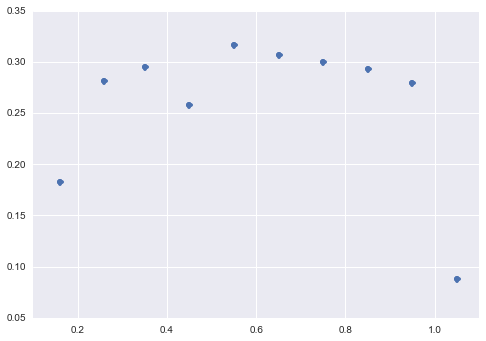

In [40]:
plt.plot(SNLS_rate_data.z, eff , 'o')